# PUBG App

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pubg = pd.read_csv('PUBG6667.csv')
pubg.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,大啊狄,2019年6月1日,1,2,不是讓我卡就是當機跟電音 還有一個是每次要打人或不打人的時候就自己轉向另一個方向 可以請問...,HotCool Game2019年6月1日親愛的玩家，很抱歉讓你遇到這樣的狀況！我們很樂意為...
1,2,指心,2019年4月20日,3,303,這遊戲出了有點小頓 其他都還可以 但如果有台灣旗幟的話可能會比較能更好 還有東西越買越貴真...,HotCool Game2019年4月26日親愛的玩家，您好!\r\n\r\n感謝您對《絕地...
2,3,奈緒Nasu,2019年6月2日,2,67,玩起來還可以 就是很該死的耗電量超大，然後有時候玩到一半會卡一下，而且講真的台灣國籍在哪，...,NaN
3,4,石邱氏,2019年4月20日,5,721,我找不到我們國家的國旗 按搜尋也沒有 是紅色的 左上角是藍白色的 它代表著青天白日滿地紅 ...,NaN
4,5,Jean Wu,2019年4月20日,2,437,我一直連不上伺服器 這是bug吧！請改善 謝謝 還有放上台灣國旗 謝謝 並打 Taiwan...,NaN


In [225]:
pubg.describe(include = 'all')

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
count,6667.000000,6667,6667,6667.000000,6667.000000,6667,1865
unique,NaN,6561,49,NaN,NaN,5613,801
top,NaN,Google 使用者,2019年4月20日,NaN,NaN,好玩,HotCool Game2019年4月20日親愛的玩家，\r\n感謝您寶貴的意見，我們很重視...
freq,NaN,6,1020,NaN,NaN,248,54
mean,3334.000000,NaN,NaN,2.889156,5.161692,NaN,NaN
std,1924.741454,NaN,NaN,1.828414,117.993721,NaN,NaN
min,1.000000,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1667.500000,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,3334.000000,NaN,NaN,3.000000,0.000000,NaN,NaN
75%,5000.500000,NaN,NaN,5.000000,0.000000,NaN,NaN


2019-04-18 00:00:00
2019-06-05 00:00:00
官方回覆率
1 : 0.39302802460697195
2 : 0.5874587458745875
3 : 0.5728744939271255
4 : 0.3622881355932203
5 : 0.03357605177993527


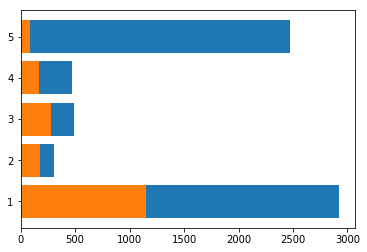

In [226]:
#計算這段時間的Rating狀況以及官方回應率
pubg['Review Date'] = pd.to_datetime(pubg['Review Date'], format = '%Y年%m月%d日')
print(pubg['Review Date'].min())
print(pubg['Review Date'].max())
Ratings = pubg.groupby('Reviewer Ratings')
ratingCnt = [] #記錄評論數量
replyCnt = [] #記錄官方回覆數量
for i in range(5):
    ratingCnt.append(Ratings['Review Body'].get_group(i+1).count())
    replyCnt.append(Ratings['Developer Reply'].get_group(i+1).count())

plt.barh([1,2,3,4,5],ratingCnt)
plt.barh([1,2,3,4,5],replyCnt)
print('官方回覆率')
for i in range(5):
    print(i+1,':',replyCnt[i]/ratingCnt[i])
plt.savefig('PUBG評分圖')

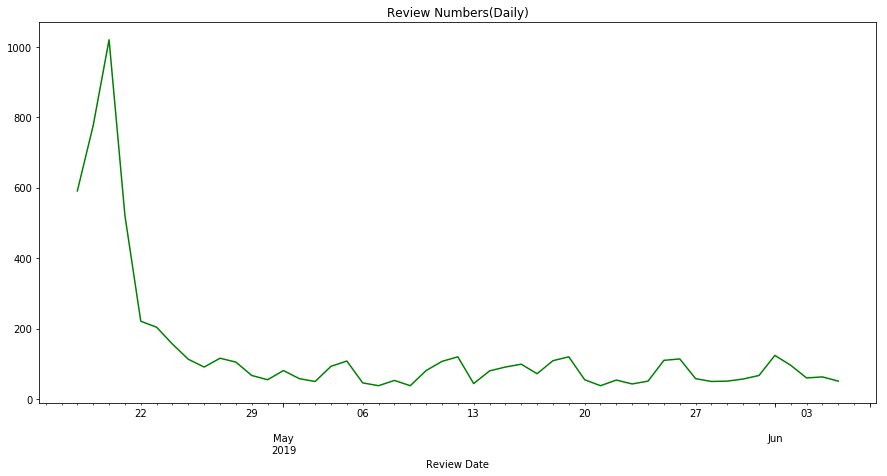

In [227]:
#評論數量隨時間變化
GroupByTime = pubg.groupby('Review Date')
GroupByTime['Reviewer Ratings'].count().plot(color = 'green', title = 'Review Numbers(Daily)',figsize = (15,7))
plt.savefig('PUBG Review Numbers(Daily)')

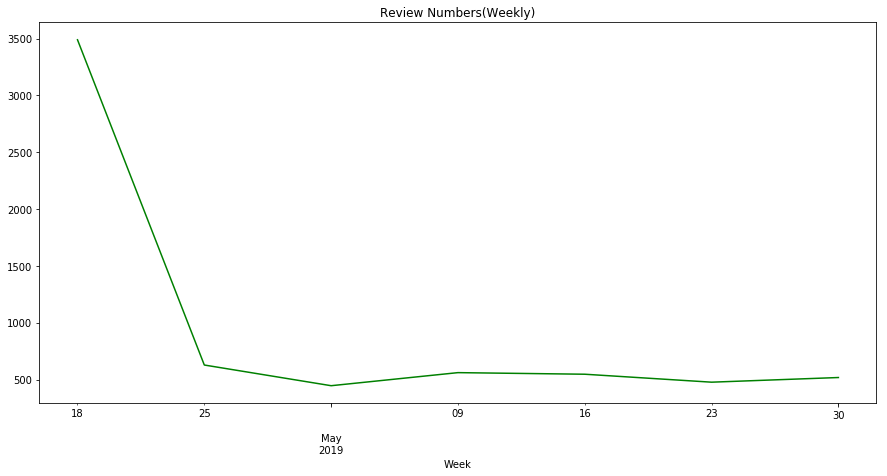

In [228]:
#隨周變化
pubg['Week'] = pubg['Review Date'].values.astype('datetime64[W]')
GroupByWeek = pubg.groupby('Week')
GroupByWeek['Reviewer Ratings'].count().plot(color = 'green', title = 'Review Numbers(Weekly)',figsize = (15,7))

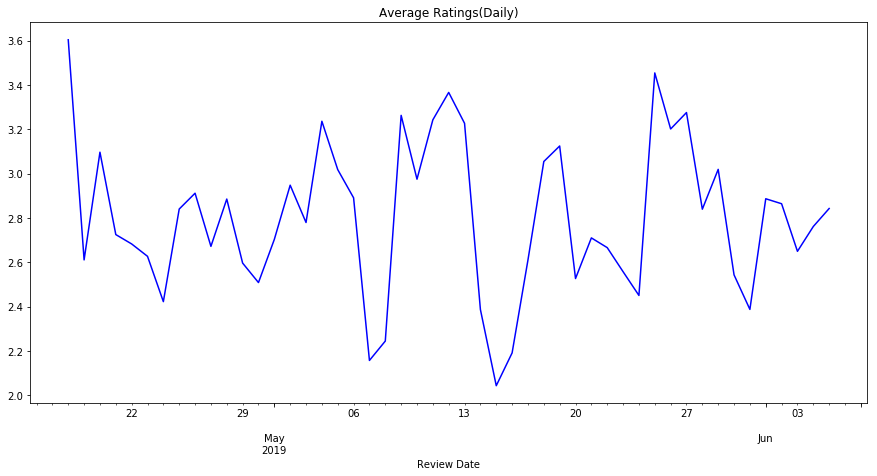

In [229]:
#評分隨時間變化
GroupByTime['Reviewer Ratings'].mean().plot(color = 'blue', title = 'Average Ratings(Daily)',figsize = (15,7))
forCompare = []
forCompare.append(GroupByTime['Reviewer Ratings'].mean())
plt.savefig('PUBG Average(Daily)')

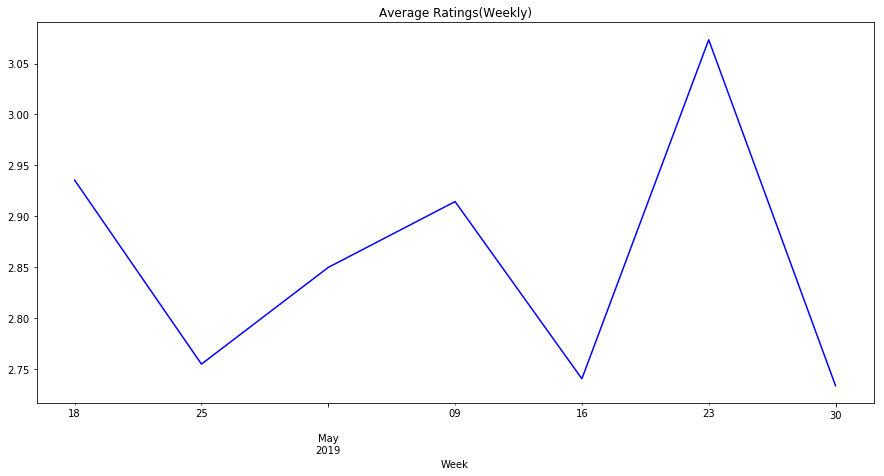

In [230]:
#隨周變化
GroupByWeek['Reviewer Ratings'].mean().plot(color = 'blue', title = 'Average Ratings(Weekly)',figsize = (15,7))

In [231]:
#加權
pubg['Likes'] += 1
pubg['Weighted Ratings'] = pubg['Reviewer Ratings'] * pubg['Likes']
pubg = pubg.groupby('Review Date').sum()
pubg['Weighted Final'] = pubg['Weighted Ratings'] / pubg['Likes']

pubg.head()

,Unnamed: 0,Reviewer Ratings,Likes,Weighted Ratings,Weighted Final
Review Date,,,,,
2019-04-18,2283345,2130,3229,11111,3.441003
2019-04-19,2715625,2029,19109,48341,2.529750
2019-04-20,3258414,3159,6799,15869,2.334020
2019-04-21,1782020,1420,2048,5144,2.511719
2019-04-22,667154,593,941,1822,1.936238


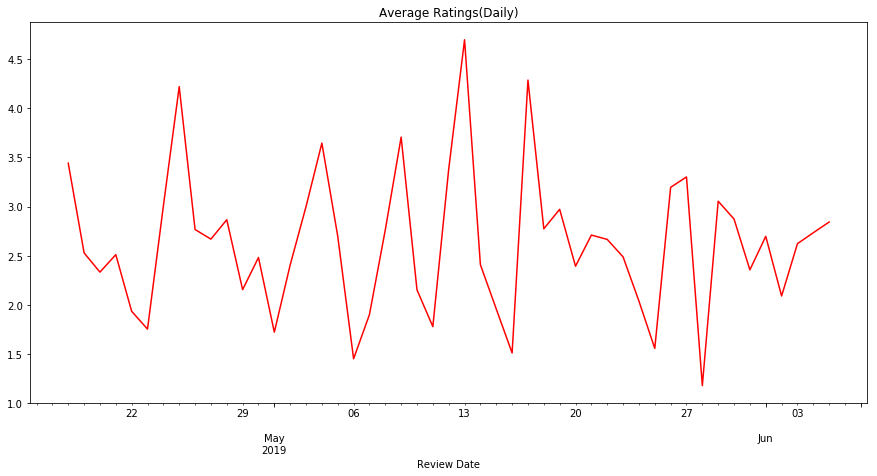

In [232]:
#加權後評分隨時間變化
pubg['Weighted Final'].plot(color = 'red', title = 'Average Ratings(Daily)',figsize = (15,7))
forCompare.append(pubg['Weighted Final'])

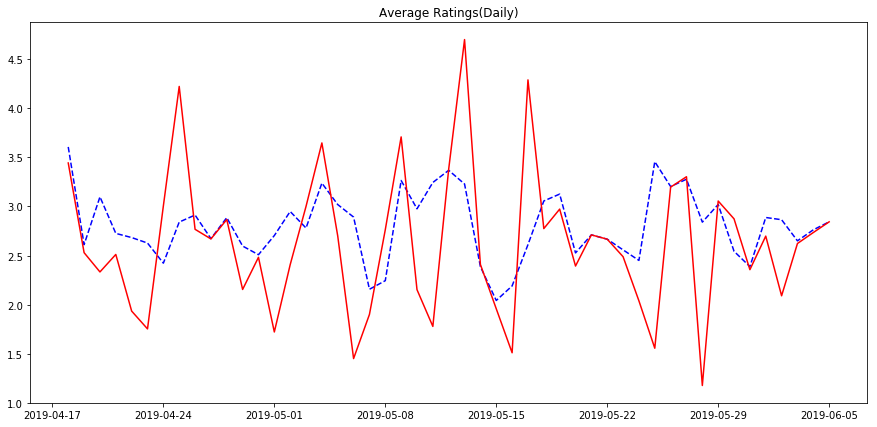

In [233]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
ax.plot(forCompare[0],'k--',color = 'b',label = 'non-weighted')
ax.plot(forCompare[1],color = 'r',label = 'weighted')
ax.set_title('Average Ratings(Daily)')
plt.savefig('PUBG comparison(Daily)')

# 傳說對決App

In [234]:
AoV = pd.read_csv('AoV17200.csv')
AoV.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,Hank Cheng,2019年5月27日,1,7,檢舉系統差真的是有目共睹，一個人整場掛在溫泉沒輸出也沒承傷居然還有評分？這系統根本就是幫多...,NaN
1,2,隆挑戰無片五千訂閱,2019年5月28日,1,45,嗎的一進到戰場就退一直退？？傻眼欸到底怎魔處理啦遊戲越做越爛…拜託好好改進好嗎而且網路明明...,NaN
2,3,偉民,2019年5月26日,2,3,打排位遇到掛機還是連續3場!扣積分不多就算了補償還那麼少希望可以補星,NaN
3,4,申彗星,2019年6月1日,5,89,可以不要這麼爛嗎 大更新之後每一場都卡 高清有的沒的都調到最低了 網路也很好卻卡到連走位都...,NaN
4,5,卓你立洋,2019年5月23日,1,5,為什麼改版完遊戲變的很卡 網路明明就很好，一直跳紅色 卡到不行 有沒有人也有這樣的問題,NaN


2019-01-29 00:00:00
2019-06-06 00:00:00
官方回覆率 :
1 : 0.0033055665741108025
2 : 0.0010649627263045794
3 : 0.007751937984496124
4 : 0.0023510971786833857
5 : 0.002332167249708479


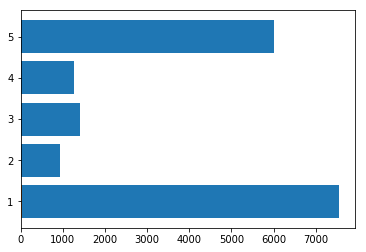

In [235]:
#計算這段時間的Rating狀況以及官方回應率
AoV['Review Date'] = pd.to_datetime(AoV['Review Date'], format = '%Y年%m月%d日')
print(AoV['Review Date'].min())
print(AoV['Review Date'].max())
Ratings = AoV.groupby('Reviewer Ratings')
ratingCnt = [] #記錄評論數量
replyCnt = [] #記錄官方回覆數量
for i in range(5):
    ratingCnt.append(Ratings['Review Body'].get_group(i+1).count())
    replyCnt.append(Ratings['Developer Reply'].get_group(i+1).count())

plt.barh([1,2,3,4,5],ratingCnt)
plt.barh([1,2,3,4,5],replyCnt)
print('官方回覆率 :')
for i in range(5):
    print(i+1,':',replyCnt[i]/ratingCnt[i])
plt.savefig('AoV評分圖')

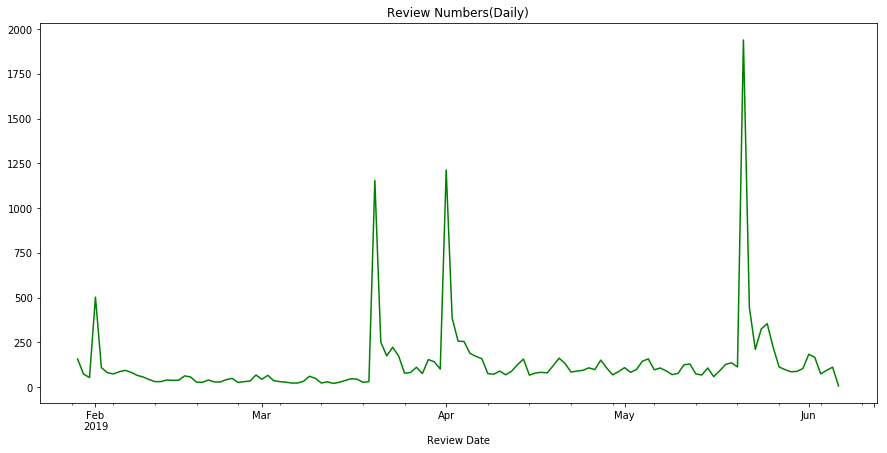

In [236]:
#評論數量隨時間變化
GroupByTime2 = AoV.groupby('Review Date')
GroupByTime2['Reviewer Ratings'].count().plot(color = 'green', title = 'Review Numbers(Daily)',figsize = (15,7))
plt.savefig('AoV Review Numbers(Daily)')

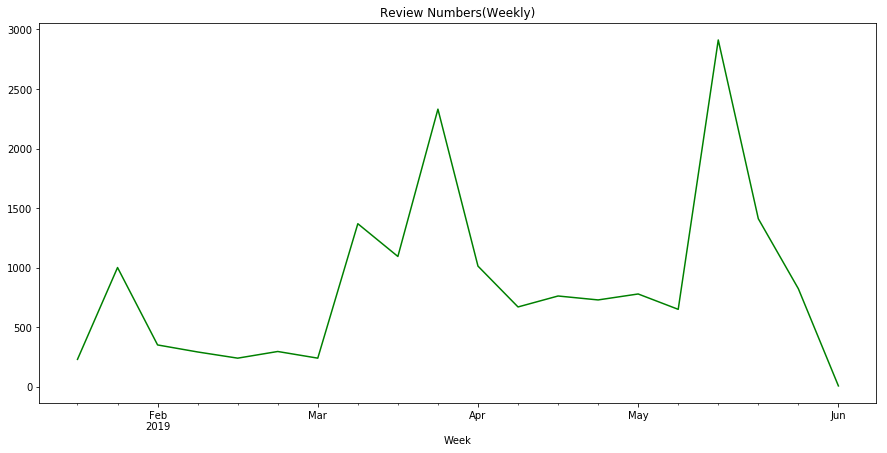

In [237]:
#隨周變化
AoV['Week'] = AoV['Review Date'].values.astype('datetime64[W]')
GroupByWeek2 = AoV.groupby('Week')
GroupByWeek2['Reviewer Ratings'].count().plot(color = 'green', title = 'Review Numbers(Weekly)',figsize = (15,7))

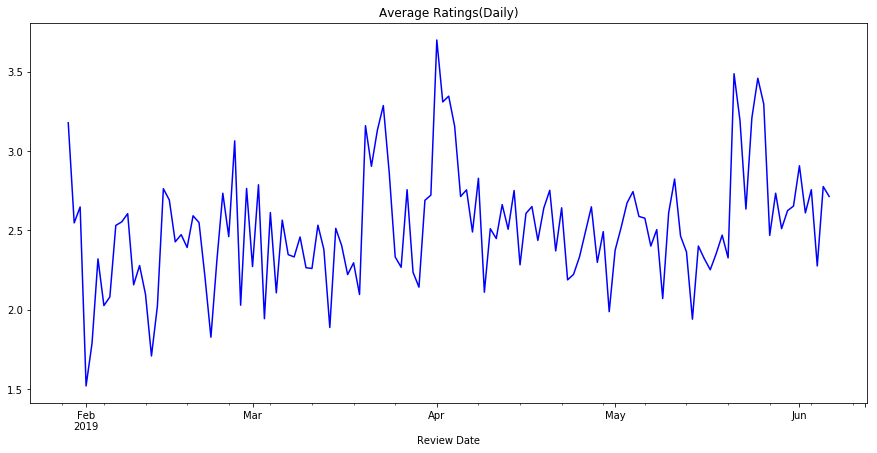

In [238]:
#評分隨時間變化
GroupByTime2['Reviewer Ratings'].mean().plot(color = 'blue', title = 'Average Ratings(Daily)',figsize = (15,7))
#forCompare = [],已宣告過
forCompare.append(GroupByTime2['Reviewer Ratings'].mean())
plt.savefig('AoV Average(Daily)')

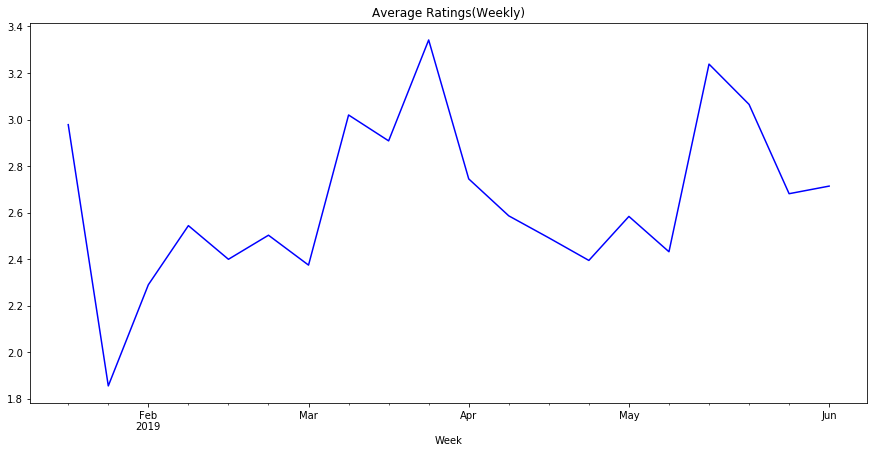

In [239]:
#隨周變化
GroupByWeek2['Reviewer Ratings'].mean().plot(color = 'blue', title = 'Average Ratings(Weekly)',figsize = (15,7))

In [240]:
#加權
AoV['Likes'] += 1
AoV['Weighted Ratings'] = AoV['Reviewer Ratings'] * AoV['Likes']
AoV = AoV.groupby('Review Date').sum()
AoV['Weighted Final'] = AoV['Weighted Ratings'] / AoV['Likes']

AoV.head()

,Unnamed: 0,Reviewer Ratings,Likes,Weighted Ratings,Weighted Final
Review Date,,,,,
2019-01-29,2359972,499,2738,8735,3.190285
2019-01-30,1084423,186,516,1172,2.271318
2019-01-31,804082,143,429,614,1.431235
2019-02-01,7293365,765,5786,9448,1.632907
2019-02-02,1594002,195,424,608,1.433962


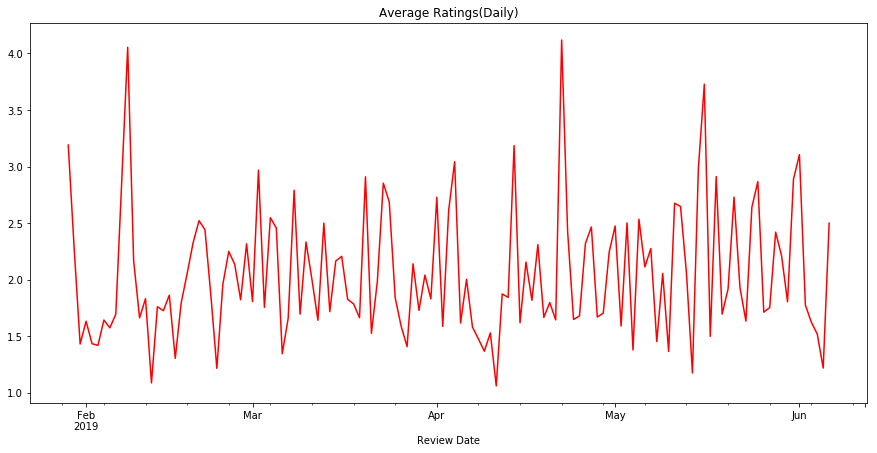

In [241]:
#加權後評分隨時間變化
AoV['Weighted Final'].plot(color = 'red', title = 'Average Ratings(Daily)',figsize = (15,7))
forCompare.append(AoV['Weighted Final'])

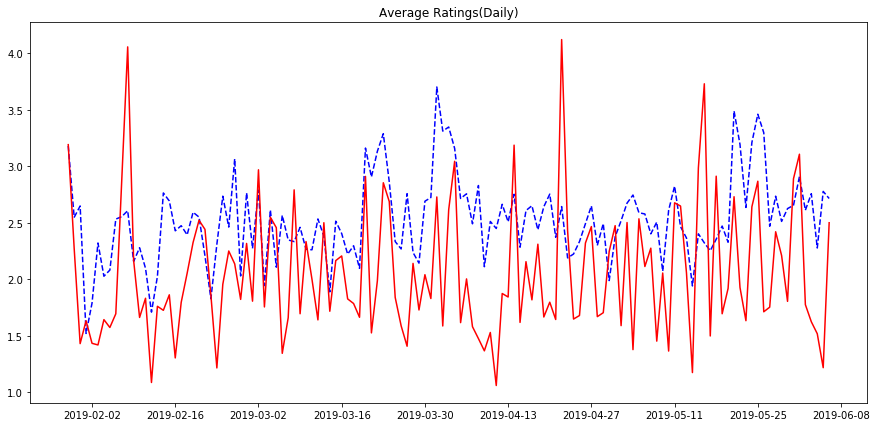

In [242]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
ax.plot(forCompare[2],'k--',color = 'b',label = 'non-weighted')
ax.plot(forCompare[3],color = 'r',label = 'weighted')
ax.set_title('Average Ratings(Daily)')
plt.savefig('AoV comparison(Daily)')